In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [533]:
dataset = pd.read_csv("desafio_indicium_imdb.csv", sep=",")
example = {
    "Series_Title": "The Shawshank Redemption",
    "Unnamed: 0": 1000,
    "IMDB_Rating": 9.3,
    "Released_Year": "1994",
    "Certificate": "A",
    "Runtime": "142 min",
    "Genre": "Drama",
    "Overview": "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
    "Meta_score": 80.0,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": "28,341,469",
}

df_example = pd.DataFrame([example])
dataset = pd.concat([dataset, df_example], ignore_index=True)

In [534]:
# dataset[dataset['Series_Title'] == 'The Shawshank Redemption']
dataset

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


# 1 - Análise Exploratória

 ## 1.1 - Tipos dos dados

 Aqui já observamos algumas inconsistências no nosso dataset, pois encontramos variáveis tipo object onde deveriam ser do tipo int. Um exemplo seria o número de vendas (Gross)

In [535]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


Podemos ver que Unnamed: 0 é uma coluna que não tem valor para nosso dataset

In [536]:
dataset.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN
999,1000,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [537]:
dataset.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,843.000000,1.000000e+03
mean,500.500000,7.949300,77.971530,2.736929e+05
std,288.819436,0.275491,12.376099,3.273727e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.750000,7.700000,70.000000,5.552625e+04
50%,500.500000,7.900000,79.000000,1.385485e+05
75%,750.250000,8.100000,87.000000,3.741612e+05
max,1000.000000,9.300000,100.000000,2.343110e+06


## 1.2 - Valores nulos

In [538]:
dataset.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [539]:
# Ordenar os valores ao longo de um dos eixos

total = dataset.isnull().sum().sort_values(ascending=False)
total.head()

Gross          169
Meta_score     157
Certificate    101
Unnamed: 0       0
Runtime          0
dtype: int64

## 1.3 - Observação

Aqui podemos ver que aproximadamente 32% do nosso dataset tem dados nulos, o que é um valor considerável na falta de dados.

In [540]:
# Quantos porcento os valores nulos representam no dataset?

percent = ((dataset.isnull().sum()/dataset.shape[0])*100).sort_values(ascending=False)
percent_df = pd.DataFrame({'Total': total, 'Porcentagem':percent})
percent_df.head()

,Total,Porcentagem
Gross,169,16.9
Meta_score,157,15.7
Certificate,101,10.1
Unnamed: 0,0,0.0
Runtime,0,0.0


In [541]:
# Removendo valores nulos

dataset.dropna(axis=0, how='any', inplace=True)
dataset.isnull().sum()
dataset.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
990,991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
991,992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
993,994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
999,1000,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [542]:
dataset.shape

(714, 16)

In [543]:
# Vendo filmes duplicados

dataset.duplicated(subset=['Series_Title']).sum()

np.int64(0)

## 1.4 - Comparativo da quantidade de vendas com relação ao IMDB, Faixa etária e Duração do filme

### 1.4.1 - Tratamento dos dados de Object para Int

In [544]:
dataset['Gross'] = dataset['Gross'].str.replace(",","")
dataset['Gross']

0      134966411
1      534858444
2       57300000
3        4360000
4      377845905
         ...    
990      1378435
991    141843612
993     13780024
996     30500000
999     28341469
Name: Gross, Length: 714, dtype: object

In [545]:
dataset['Gross'] = pd.to_numeric(dataset['Gross'], errors='coerce')

In [546]:
dataset['Runtime'] = dataset['Runtime'].str.replace("min","")
dataset['Runtime'] = pd.to_numeric(dataset['Runtime'], errors='coerce')
dataset['Runtime']

0      175
1      152
2      202
3       96
4      201
      ... 
990    144
991     78
993     87
996    118
999    142
Name: Runtime, Length: 714, dtype: int64

In [547]:
# Passed e Approved é a mesma coisa que U
dataset['Certificate'] = dataset['Certificate'].replace(['Passed', 'Approved'], 'U')

certificate_list = list(dataset["Certificate"].unique())
certificate_imdb = []
certificate_gross = []
certificate_time = []

### 1.4.2 - Vendo qual o maior número de vendas com base no imdb, tempo de filme e faixa etária. 

In [548]:

for i in certificate_list:
    x = dataset[dataset["Certificate"] == i]
    if(len(x)!=0):
        imdb = sum(x.IMDB_Rating)/len(x)
        gross = sum(x.Gross)/len(x)
        time = sum(x.Runtime)/len(x)
        certificate_imdb.append(imdb)
        certificate_gross.append(gross)
        certificate_time.append(time)
    else:
        imdb = sum(x.IMDB_Rating)
        gross = sum(x.Gross)
        time = sum(x.Runtime)
        certificate_gross.append(gross)
        certificate_imdb.append(imdb)
        certificate_time.append(time)

df_certificate = pd.DataFrame({'Gross': certificate_gross,'Certificate': certificate_list, 'IMDB_Rating': certificate_imdb, 'Time':certificate_time})
df_certificate.sort_values(by="Gross", ascending=False).head(30)

,Gross,Certificate,IMDB_Rating,Time
1,1.500956e+08,UA,7.929577,127.711268
2,8.805820e+07,U,7.964646,121.676768
0,6.603609e+07,A,8.001149,129.034483
4,5.508732e+07,G,8.022222,115.000000
5,3.780400e+07,PG-13,7.784211,112.210526
3,2.653840e+07,R,7.866412,121.091603
8,2.602096e+07,U/A,7.600000,102.000000
6,2.015480e+07,PG,7.905263,111.947368
9,1.378435e+06,GP,7.600000,144.000000
7,1.066620e+05,TV-PG,8.000000,119.000000


Dos resultados acima vemos que a classificação de 12 anos (UA) é a que tem maior número de vendas, além de observarmos que os filmes na faixa de 115 - 130 minutos estão entre os mais vendidos.

### 1.4.3 - Qual filme recomendar para uma pessoa desconhecida?

Por ser uma pessoa desconhecida, devemos levar em consideração a faixa etária da pessoa, logo, devemos selecionar filmes com a faixa etária livre para todas as idades (U). Seguindo para a análise dos dados do filme, vamos selecionar o filme que tenha maior número de vendas e IMDB, e vamos selecionar os filmes com menor número Meta_score,ou seja, com a menor crítica.

* Qual filme recomendar? The Lord of the Rings: The Return of the King

In [549]:
filtered_dataset = dataset[dataset["Certificate"] == "U"]

# Normalizar as colunas (min-max normalization)
filtered_dataset['Gross_norm'] = (filtered_dataset['Gross'] - filtered_dataset['Gross'].min()) / (filtered_dataset['Gross'].max() - filtered_dataset['Gross'].min())
filtered_dataset['IMDB_Rating_norm'] = (filtered_dataset['IMDB_Rating'] - filtered_dataset['IMDB_Rating'].min()) / (filtered_dataset['IMDB_Rating'].max() - filtered_dataset['IMDB_Rating'].min())
filtered_dataset['Meta_score_norm'] = (filtered_dataset['Meta_score'] - filtered_dataset['Meta_score'].min()) / (filtered_dataset['Meta_score'].max() - filtered_dataset['Meta_score'].min())

# Calcular a soma das classificações normalizadas
filtered_dataset['Total_score'] = filtered_dataset['Gross_norm'] + filtered_dataset['IMDB_Rating_norm'] + filtered_dataset['Meta_score_norm']

# Encontrar o filme com a maior soma total
top_film = filtered_dataset.loc[filtered_dataset['Total_score'].idxmax()]

# Exibir os resultados
print("Filme com a maior soma de IMDB_Rating, Gross e Meta_score:")
print(top_film[['Series_Title', 'Gross', 'IMDB_Rating', 'Meta_score', 'Certificate']])  

Filme com a maior soma de IMDB_Rating, Gross e Meta_score:
Series_Title    The Lord of the Rings: The Return of the King
Gross                                               377845905
IMDB_Rating                                               8.9
Meta_score                                               94.0
Certificate                                                 U
Name: 4, dtype: object


C:\Users\Akyla\AppData\Local\Temp\ipykernel_6252\163517428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Gross_norm'] = (filtered_dataset['Gross'] - filtered_dataset['Gross'].min()) / (filtered_dataset['Gross'].max() - filtered_dataset['Gross'].min())
C:\Users\Akyla\AppData\Local\Temp\ipykernel_6252\163517428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['IMDB_Rating_norm'] = (filtered_dataset['IMDB_Rating'] - filtered_dataset['IMDB_Rating'].min()) / (filtered_

## 1.5 - O que influência os as vendas de um filme?

Um método que seria bem interessante de utilizar aqui seria uma matriz de correlação, para ver o que mais quais variáveis que mais influênciam nas vendas de um filme.

* OBS: O método de correlação não implica em uma causalidade.

### 1.5.1 - Transformando colunas 

Aqui nos vamos pegar a coluna de gênero dos filmes e certificados e separar para cada valor único, transformando eles em uma coluna onde pode ser True ou False para cada.

In [550]:
df_encoded = (dataset['Genre'].str.split(',').explode()).str.replace(" ","")
df_encoded = pd.get_dummies(df_encoded).groupby(df_encoded.index).sum()
certificates_dummies = pd.get_dummies(dataset['Certificate'])



df_encoded = pd.concat([dataset,df_encoded,certificates_dummies], axis=1)
df_encoded = df_encoded.drop(['Genre','Unnamed: 0','Certificate'], axis=1)
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

matrix_corr = df_encoded[df_encoded.select_dtypes(include=['int','float']).columns].corr()

# Pegamos as correlações com Gross maiores que 0.3 (arbitrário)
best_gross = matrix_corr['Gross'][(matrix_corr['Gross'] > 0.3)]
best_gross


No_of_Votes    0.544882
Gross          1.000000
Action         0.335731
Adventure      0.442036
UA             0.310413
Name: Gross, dtype: float64

### 1.5.2 - Resultados

A partir da matriz de correlação podemos ver que:
* O número de votos em um filme é o que mais influencia nos aumentos de vendas, pois é a variável mais próxima de 1
* Gêneros do tipo Ação e Aventura, influênciam nas vendas de um filme.
* A faixa etária do filme ser UA, maiores de 12 anos, influência nas vendas.
  
Podemos ver também o que mais afeta negativamente nas vendas:

In [551]:
worse_gross = matrix_corr['Gross'][(matrix_corr['Gross'] < -0.3)]
worse_gross

Drama   -0.322698
Name: Gross, dtype: float64

Como o parâmetro de separação da matrix_cor foi escolhi arbitráriamente:

* Vemos que o gênero Drama, afeta negativamente nas vendas de um filme.

# 2 - Modelo de Previsão

* Quanto ao modelo, iremos trabalhar com resultados que são gerados por meio de regressão. Porque? por que nesse caso não faz sentido usarmos um modelo de classificação, pois nosso objetivo não é classificar algo, mas sim inferir um resultado com base nos dados existentes.
* Nesse caso, iremos pegar as variáveis que foram transformadas para inteiro. No caso de modelos preditivos, precisamos analisar variáveis que não estejam correlacionadas linearmente, ou seja, na matriz de correlação elas devem estar próximas de 0.

## Regressão Polinomial

In [552]:
# Pegamos as correlações com IMDB_Rating entre -0.4 e +0.4 (exclusivamente)
imdb_corr = matrix_corr["IMDB_Rating"][
    (matrix_corr["IMDB_Rating"] < 1) & (matrix_corr["IMDB_Rating"] > -1)
]

data_model = df_encoded[df_encoded.select_dtypes(include=["int", "float"]).columns]
data_model = data_model.reset_index(drop=True)
data_exemplo = data_model.iloc[713]
# Redefinir o índice para garantir que estamos removendo a linha correta

# Remover a linha 713
data_model = data_model.drop(713, axis=0)


X = data_model[imdb_corr.index]
Y = data_model["IMDB_Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [553]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])
param_grid = {
    'poly__degree': [2, 3],
    'linear__fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Melhores hiperparâmetros encontrados:
{'linear__fit_intercept': True, 'poly__degree': 2}


Erro Quadrático Médio (MSE): 0.05126529881527828
R-squared (R2): 0.3899559510523354


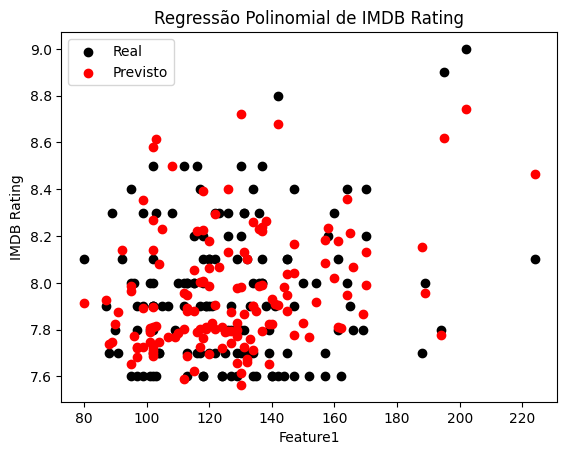

In [554]:
# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Plotar resultados
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Real')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Previsto')
plt.title('Regressão Polinomial de IMDB Rating')
plt.xlabel('Feature1')
plt.ylabel('IMDB Rating')
plt.legend()
plt.show()


## Random Forest

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'n_estimators': 500}
Mean Squared Error (MSE): 0.0394032863192266
R-squared (R2): 0.5311108901434649


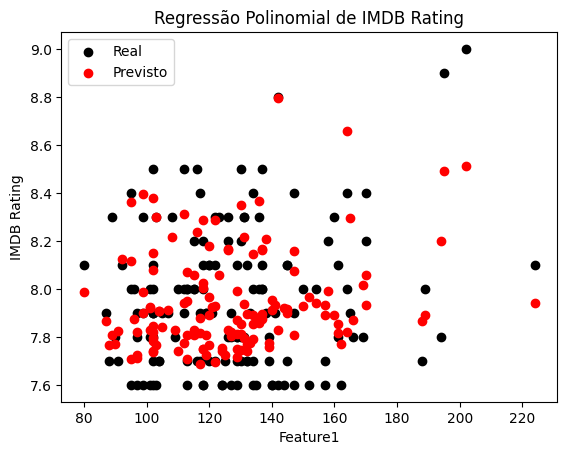

In [555]:
# Inicializar o modelo de Random Forest

param_grid = {
    'n_estimators': [50, 200, 500],
    'max_depth': [None, 10, 20, 50]
}

rf_model = RandomForestRegressor( random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Treinar o modelo

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rf_model.fit(X_train, y_train)


# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plotar resultados
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Real')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Previsto')
plt.title('Regressão Polinomial de IMDB Rating')
plt.xlabel('Feature1')
plt.ylabel('IMDB Rating')
plt.legend()
plt.show()

In [558]:
predict_example = rf_model.predict(data_exemplo[imdb_corr.index].values.reshape(1, -1))
print(f"Predição para o exemplo: {predict_example[0]}")

Predição para o exemplo: 8.81199999999999


d:\Desktop\Projetos\Desafio LighHouse\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
